### Nama : Muhammad Ilham Febriana
### NIM : 2602656022
### Jawaban nomor 4 Final Exam ML BINUS

# Data preparation

Ukuran dataset: (20045, 10)

5 data teratas:
                  Port Name       State  Port Code            Border  \
40521    Sault Sainte Marie    Michigan       3803  US-Canada Border   
63687            Port Huron    Michigan       3802  US-Canada Border   
58205                  Roma       Texas       2310  US-Mexico Border   
312391             Frontier  Washington       3020  US-Canada Border   
216868  International Falls   Minnesota       3604  US-Canada Border   

            Date                  Measure  Value  Latitude  Longitude  \
40521   Sep 2017        Personal Vehicles  69365    46.509    -84.361   
63687   Jan 2019                   Trucks  67543    42.999    -82.424   
58205   Sep 2019  Truck Containers Loaded    300    26.404    -99.019   
312391  Dec 2001        Personal Vehicles   2596    49.000   -117.832   
216868  Oct 2006              Pedestrians   1354    48.608    -93.401   

                               Point  
40521   POINT (-84.360833 46.508611)  
63687

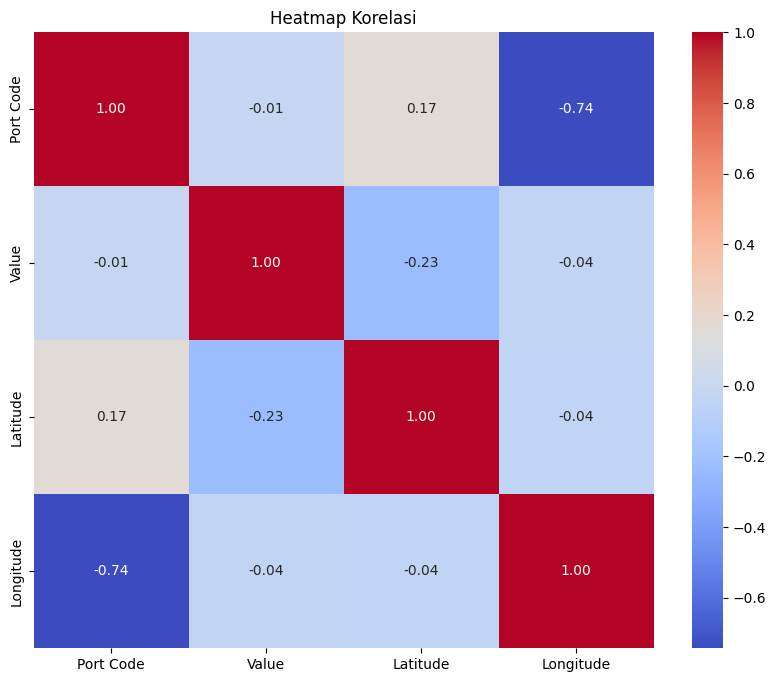

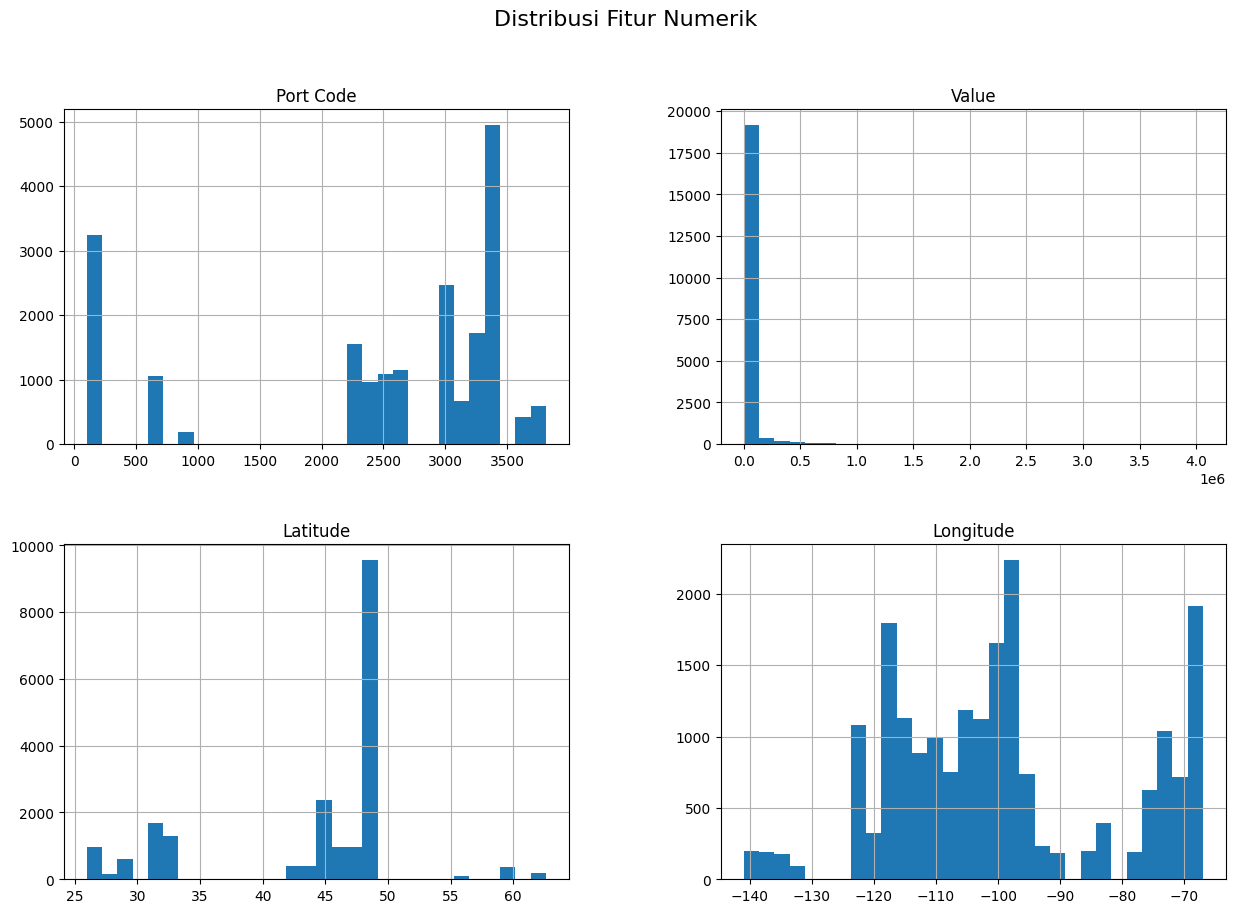

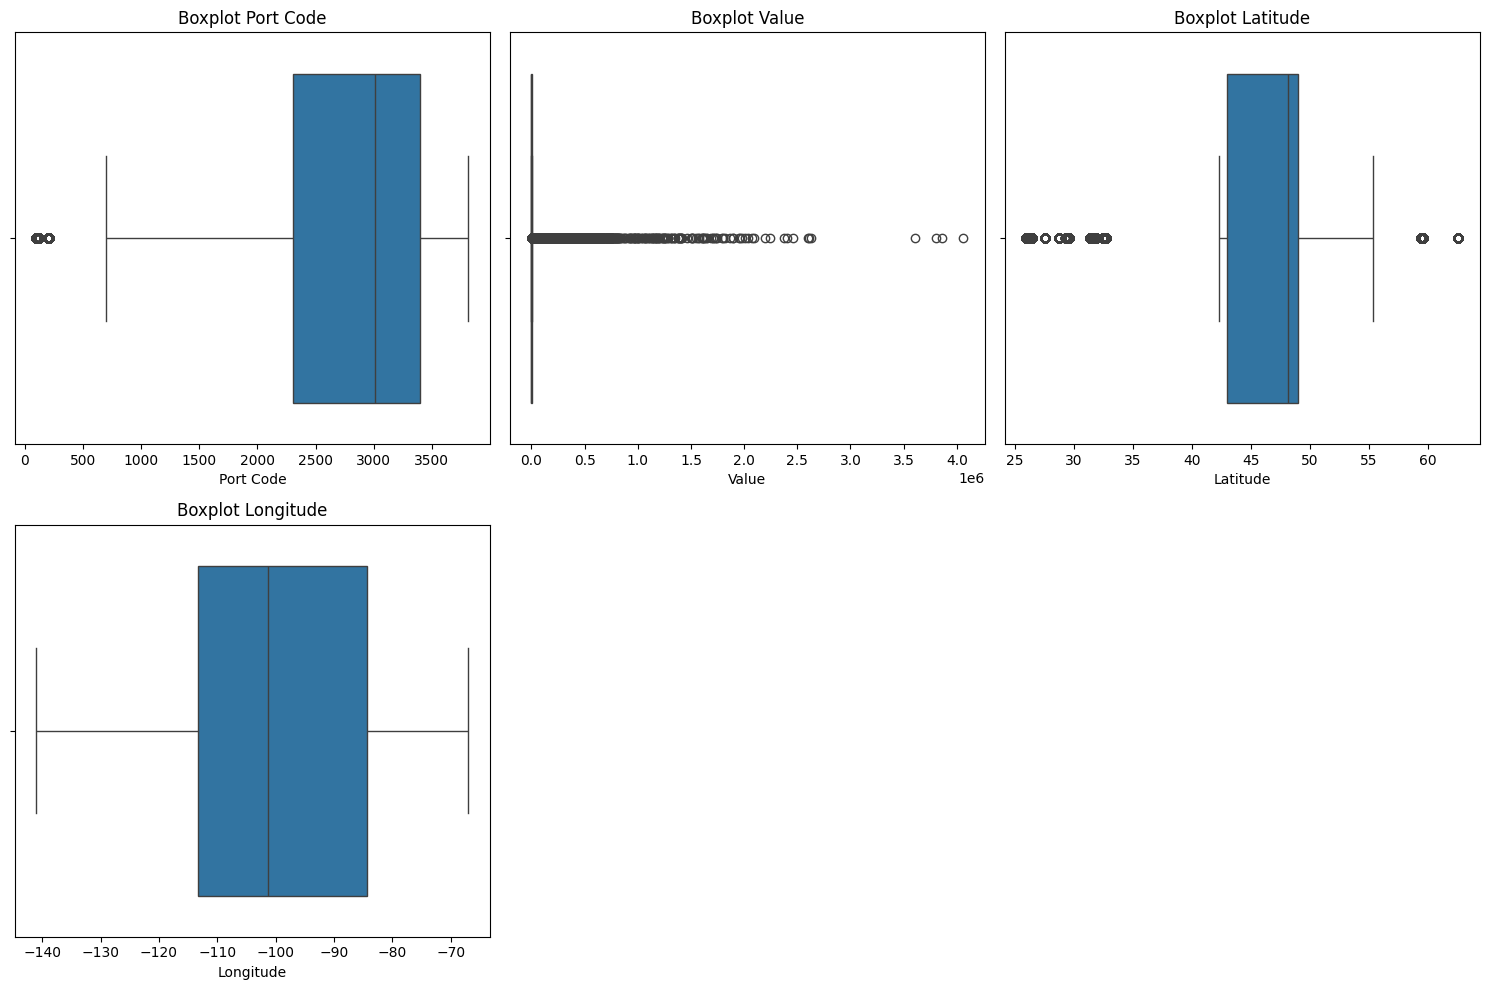

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_full = pd.read_csv('Border_Crossing_Entry_Data.csv')

# Ambil 20% sampel acak dari dataframe
df_half = df_full.sample(frac=0.05, random_state=42)
# Lihat struktur dasar dataframe
print("Ukuran dataset:", df_half.shape)
print("\n5 data teratas:")
print(df_half.head())

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df_half.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

# Distribusi fitur numerik (histogram)
df_half.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

# Boxplot untuk deteksi outlier
numerics = df_half.select_dtypes(include=['int64', 'float64']).columns  
# Menentukan jumlah kolom dan baris untuk grid  
num_cols = 3  # Menentukan jumlah kolom  
num_rows = (len(numerics) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang diperlukan  

# Mempersiapkan figure dan axes  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  

# Mengubah axes menjadi array satu dimensi untuk kemudahan iterasi  
axes = axes.flatten()  

# Membuat boxplot untuk setiap kolom numerik  
for idx, col in enumerate(numerics):  
    sns.boxplot(data=df_half, x=col, ax=axes[idx])  
    axes[idx].set_title(f'Boxplot {col}')  

# Menyembunyikan axes yang tidak terpakai (jika ada)  
for j in range(idx + 1, num_rows * num_cols):  
    fig.delaxes(axes[j])  

# Mengatur layout untuk memperbaiki tampilan  
plt.tight_layout()  
plt.show()  



Data setelah outlier dihapus:


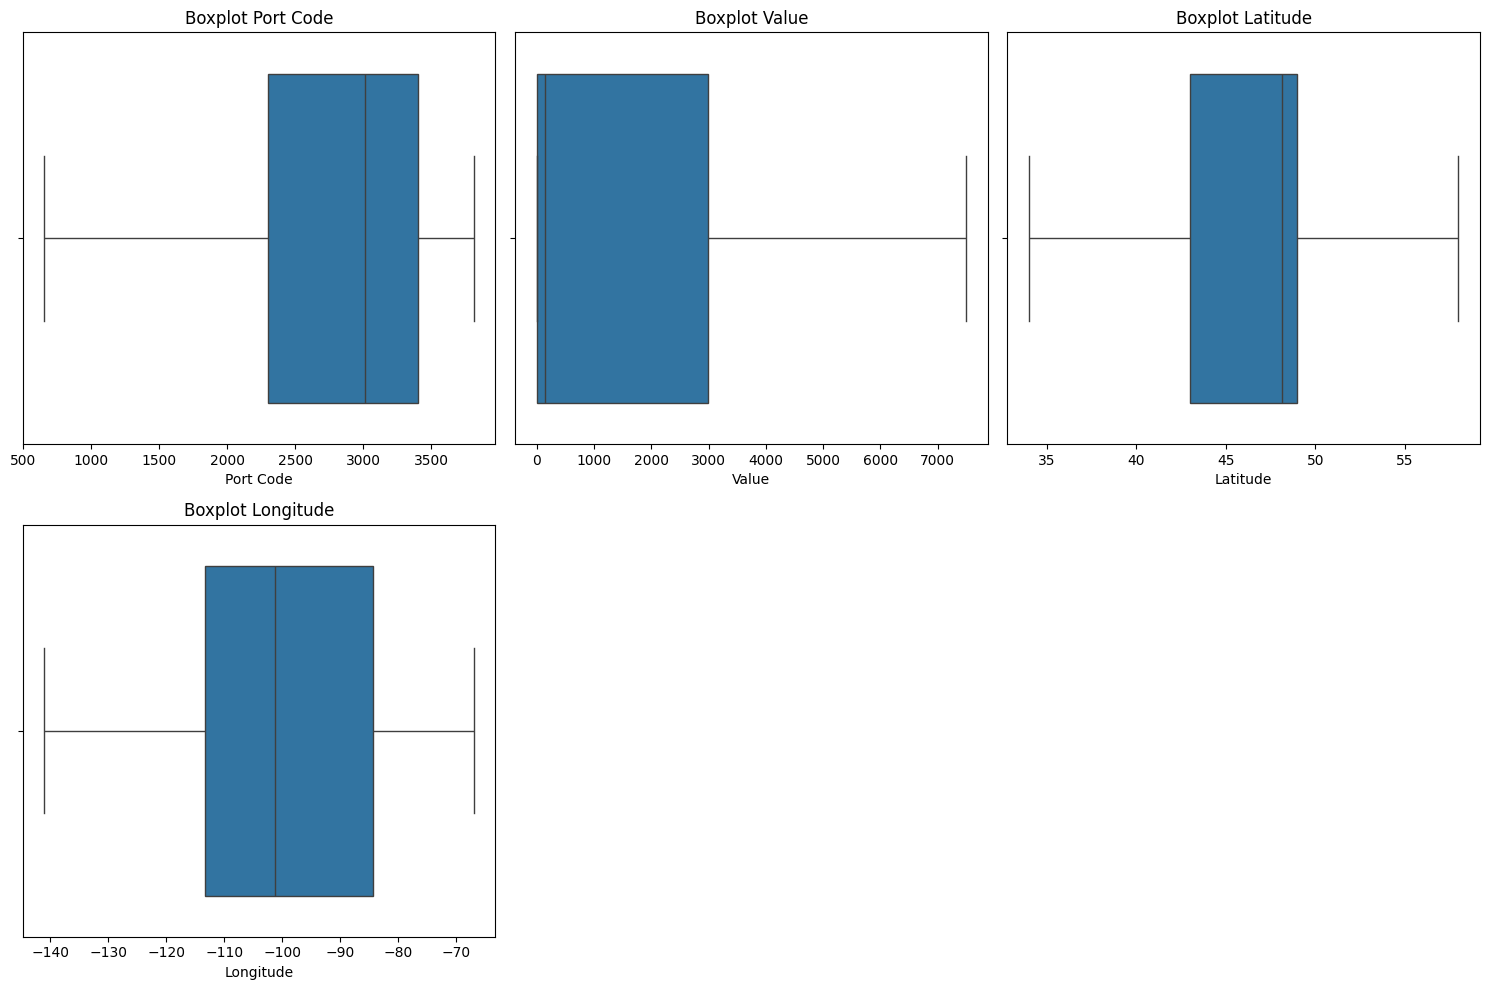


Ukuran dataset setelah menghapus outlier: (20045, 10)


In [109]:
def remove_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    """
    Menghapus outlier dari setiap kolom numerik (int atau float) dalam DataFrame
    menggunakan metode Interquartile Range (IQR).
    """
    # Salin dataframe agar data asli tidak berubah
    df_clean = df.copy()

    # Ambil hanya kolom numerik
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter baris yang tidak outlier
        df_clean[col] = df_clean[col].apply(
            lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
        )

    return df_clean

df_clean = remove_outliers_iqr(df_half)

print("\nData setelah outlier dihapus:")
numerics = df_clean.select_dtypes(include=['int64', 'float64']).columns  
# Menentukan jumlah kolom dan baris untuk grid  
num_cols = 3  # Menentukan jumlah kolom  
num_rows = (len(numerics) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang diperlukan  

# Mempersiapkan figure dan axes  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  

# Mengubah axes menjadi array satu dimensi untuk kemudahan iterasi  
axes = axes.flatten()  

# Membuat boxplot untuk setiap kolom numerik  
for idx, col in enumerate(numerics):  
    sns.boxplot(data=df_clean, x=col, ax=axes[idx])  
    axes[idx].set_title(f'Boxplot {col}')  

# Menyembunyikan axes yang tidak terpakai (jika ada)  
for j in range(idx + 1, num_rows * num_cols):  
    fig.delaxes(axes[j])  

# Mengatur layout untuk memperbaiki tampilan  
plt.tight_layout()  
plt.show()  


print("\nUkuran dataset setelah menghapus outlier:", df_clean.shape)
df_half = df_clean

In [71]:
#  2. Info kolom dan tipe data
print("\nInformasi kolom:")
print(df_half.info())

# 3. Cek missing values
print("\nJumlah missing value per kolom:")
print(df_half.isnull().sum())
# No missing value from the sample data

# 4. Statistik deskriptif
print("\nStatistik deskriptif:")
print(df_half.describe())



Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
Index: 20045 entries, 40521 to 104082
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Port Name  20045 non-null  object 
 1   State      20045 non-null  object 
 2   Port Code  20045 non-null  float64
 3   Border     20045 non-null  object 
 4   Date       20045 non-null  object 
 5   Measure    20045 non-null  object 
 6   Value      20045 non-null  float64
 7   Latitude   20045 non-null  float64
 8   Longitude  20045 non-null  float64
 9   Point      20045 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.7+ MB
None

Jumlah missing value per kolom:
Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64

Statistik deskriptif:
         Port Code         Value      Latitude     Longitude
count  20045.00000  20045.000000  20045.000000  20045.00

In [72]:
print(df_half.nunique())  # jumlah nilai unik tiap kolom
print(df_half['Measure'].unique())  # nama-nama kolom
print(df_half.describe)

Port Name     116
State          14
Port Code     100
Border          2
Date          352
Measure        12
Value        3258
Latitude       45
Longitude     116
Point         116
dtype: int64
['Personal Vehicles' 'Trucks' 'Truck Containers Loaded' 'Pedestrians'
 'Trains' 'Train Passengers' 'Bus Passengers' 'Rail Containers Empty'
 'Personal Vehicle Passengers' 'Rail Containers Loaded'
 'Truck Containers Empty' 'Buses']
<bound method NDFrame.describe of                      Port Name         State  Port Code            Border  \
40521       Sault Sainte Marie      Michigan     3803.0  US-Canada Border   
63687               Port Huron      Michigan     3802.0  US-Canada Border   
58205                     Roma         Texas     2310.0  US-Mexico Border   
312391                Frontier    Washington     3020.0  US-Canada Border   
216868     International Falls     Minnesota     3604.0  US-Canada Border   
...                        ...           ...        ...               ...   
326

In [73]:

df_selected = df_half[['State','Port Name', 'Border', 'Date', 'Measure', 'Value', 'Latitude', 'Longitude']]
print("\nData setelah mengambil kolom penting:")
print(df_selected.head())
print(df_selected.describe)



Data setelah mengambil kolom penting:
             State            Port Name            Border      Date  \
40521     Michigan   Sault Sainte Marie  US-Canada Border  Sep 2017   
63687     Michigan           Port Huron  US-Canada Border  Jan 2019   
58205        Texas                 Roma  US-Mexico Border  Sep 2019   
312391  Washington             Frontier  US-Canada Border  Dec 2001   
216868   Minnesota  International Falls  US-Canada Border  Oct 2006   

                        Measure   Value  Latitude  Longitude  
40521         Personal Vehicles  7495.0   46.5090    -84.361  
63687                    Trucks  7495.0   42.9990    -82.424  
58205   Truck Containers Loaded   300.0   33.9975    -99.019  
312391        Personal Vehicles  2596.0   49.0000   -117.832  
216868              Pedestrians  1354.0   48.6080    -93.401  
<bound method NDFrame.describe of                State               Port Name            Border      Date  \
40521       Michigan      Sault Sainte Marie  

In [74]:
df_selected['Date'] = pd.to_datetime(df_selected['Date'])
df_selected['Year'] = df_selected['Date'].dt.year
df_selected['Month'] = df_selected['Date'].dt.month

df_selected.drop('Date', axis=1, inplace=True)
print("\nData setelah menambahkan kolom Tahun dan Bulan:")
print(df_selected.head())


Data setelah menambahkan kolom Tahun dan Bulan:
             State            Port Name            Border  \
40521     Michigan   Sault Sainte Marie  US-Canada Border   
63687     Michigan           Port Huron  US-Canada Border   
58205        Texas                 Roma  US-Mexico Border   
312391  Washington             Frontier  US-Canada Border   
216868   Minnesota  International Falls  US-Canada Border   

                        Measure   Value  Latitude  Longitude  Year  Month  
40521         Personal Vehicles  7495.0   46.5090    -84.361  2017      9  
63687                    Trucks  7495.0   42.9990    -82.424  2019      1  
58205   Truck Containers Loaded   300.0   33.9975    -99.019  2019      9  
312391        Personal Vehicles  2596.0   49.0000   -117.832  2001     12  
216868              Pedestrians  1354.0   48.6080    -93.401  2006     10  


C:\Users\Ilham\AppData\Local\Temp\ipykernel_33200\906169316.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected['Date'] = pd.to_datetime(df_selected['Date'])
C:\Users\Ilham\AppData\Local\Temp\ipykernel_33200\906169316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'])
C:\Users\Ilham\AppData\Local\Temp\ipykernel_33200\906169316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [75]:
print("\nStatistik deskriptif setelah penambahan kolom:")
print(df_selected.nunique())  # jumlah nilai unik tiap kolom


Statistik deskriptif setelah penambahan kolom:
State          14
Port Name     116
Border          2
Measure        12
Value        3258
Latitude       45
Longitude     116
Year           30
Month          12
dtype: int64


# Data Pre-processing

In [110]:
# Encoding kolom kategorikal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['State', 'Border', 'Measure', 'Port Name']

df_encoded = pd.get_dummies(df_selected, columns=categorical_cols)

In [111]:

# Normalisasi fitur numerik

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
print(df_encoded.shape)
numerical_cols = ['Value', 'Latitude', 'Longitude', 'Year', 'Month']


# Menggunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df_encoded)
print("Data scaler sebelum di dataframe : ", df_scaler)

# Mengubah hasil scaler menjadi DataFrame dengan nama kolom yang sesuai
X_final = pd.DataFrame(df_scaler)
print(X_final)

print(X_final)

(20045, 149)
Data scaler sebelum di dataframe :  [[1.         0.52122563 0.76518826 ... 0.         0.         0.        ]
 [1.         0.375      0.79135651 ... 0.         0.         0.        ]
 [0.04002668 0.         0.56716337 ... 0.         0.         0.        ]
 ...
 [0.01867912 0.62495834 0.415909   ... 1.         0.         0.        ]
 [0.00653769 0.625      0.44059118 ... 0.         0.         0.        ]
 [0.34302869 0.45873604 0.91255184 ... 0.         0.         0.        ]]
            0         1         2         3         4    5    6    7    8    \
0      1.000000  0.521226  0.765188  0.724138  0.727273  0.0  0.0  0.0  0.0   
1      1.000000  0.375000  0.791357  0.793103  0.000000  0.0  0.0  0.0  0.0   
2      0.040027  0.000000  0.567163  0.793103  0.727273  0.0  0.0  0.0  0.0   
3      0.346364  0.625000  0.313006  0.172414  1.000000  0.0  0.0  0.0  0.0   
4      0.180654  0.608669  0.643061  0.344828  0.818182  0.0  0.0  0.0  0.0   
...         ...       ...       .

# Data Modeling

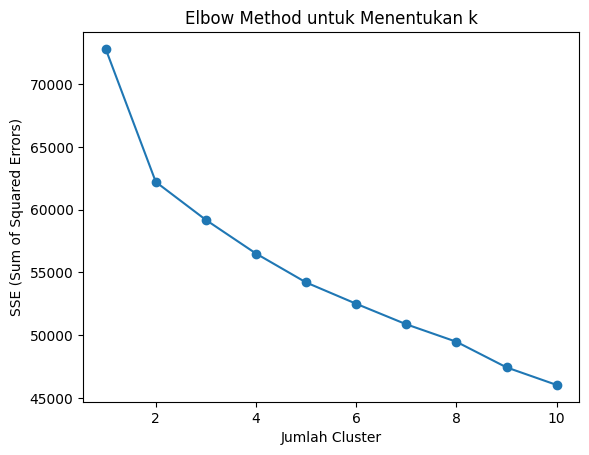

Nilai K yang optimal di antara 3-5, kita pilih 4


In [99]:
# Elbow method untuk menentukan jumlah cluster yang tepat
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_final)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method untuk Menentukan k')
plt.show()
print("Nilai K yang optimal di antara 3-5, kita pilih 4")


In [100]:
print(X_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20045 entries, 0 to 20044
Columns: 149 entries, 0 to 148
dtypes: float64(149)
memory usage: 22.8 MB
None


In [101]:
from sklearn.metrics import silhouette_score
score = 0
best_k = None
best_score = float('-inf')  # Initialize with the smallest possible value

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_final)
    score = silhouette_score(X_final, labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")
    if score > best_score:  # Compare with best_score instead of score
        best_k = k
        best_score = score 

print(f"Nilai Silhouette Score tertinggi pada k= {best_k} dengan nilai {best_score:.4f}")

k = 2, Silhouette Score = 0.1748
k = 3, Silhouette Score = 0.1008
k = 4, Silhouette Score = 0.1114
k = 5, Silhouette Score = 0.1263
k = 6, Silhouette Score = 0.1305
k = 7, Silhouette Score = 0.1444
k = 8, Silhouette Score = 0.1332
k = 9, Silhouette Score = 0.1514
k = 10, Silhouette Score = 0.1630
Nilai Silhouette Score tertinggi pada k= 2 dengan nilai 0.1748


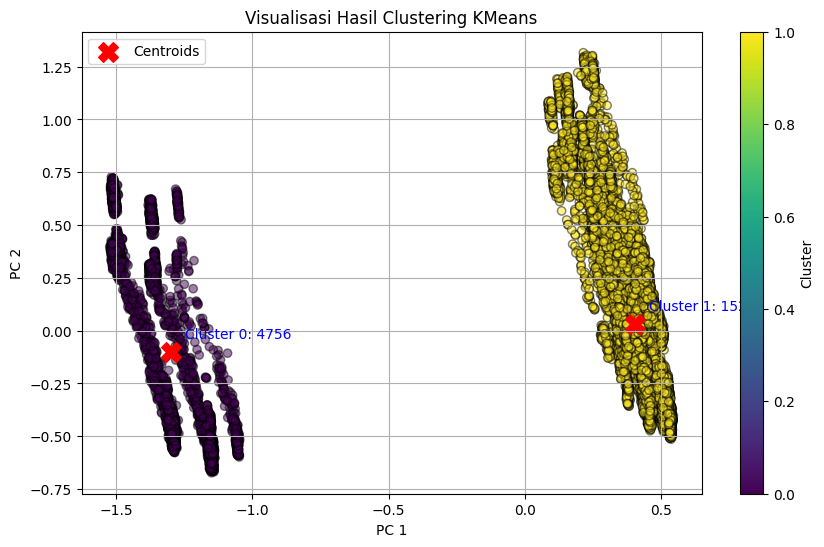

Jumlah anggota di setiap cluster:
Cluster 0: 4756
Cluster 1: 15289
Silhouette Score: 0.1748453667374582
Davies-Bouldin Index: 2.040903622430954
Inertia: 62201.1432558879


In [102]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score  

kmeans = KMeans(n_clusters=best_k, init='random', n_init=10, max_iter=100, random_state=42)
kmeans.fit(X_final)
# Menambahkan label cluster ke dataframe
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

# Mendapatkan label cluster dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  
centroids_pca = pca.transform(centroids)  

# Menghitung jumlah data di setiap cluster  
unique, counts = np.unique(labels, return_counts=True)  
cluster_counts = dict(zip(unique, counts))  

# Menyusun ulang label berdasarkan jumlah item  
sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)  
new_labels = {cluster: i for i, (cluster, _) in enumerate(sorted_clusters)}  
adjusted_labels = np.vectorize(new_labels.get)(labels)  

# Menghitung jumlah di setiap cluster baru  
adjusted_counts = {i: counts[i] for i in range(len(sorted_clusters))}  
# Visualisasi hasil clustering

# Plotting  
plt.figure(figsize=(10, 6))  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolor='k')  
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')  
plt.title('Visualisasi Hasil Clustering KMeans')  
plt.xlabel('PC 1')  
plt.ylabel('PC 2')  
plt.colorbar(label='Cluster')  
plt.grid()  
plt.legend()  

# Menambahkan jumlah total di masing-masing cluster  
for i, (cluster, count) in enumerate(cluster_counts.items()):  
    plt.annotate(f'Cluster {cluster}: {count}',   
                 xy=(centroids_pca[i, 0], centroids_pca[i, 1]),   
                 xytext=(10, 10),   
                 textcoords='offset points',   
                 fontsize=10,   
                 color='blue')  

plt.show()  

# Mencetak total jumlah untuk masing-masing cluster  
print("Jumlah anggota di setiap cluster:")  
for cluster, count in cluster_counts.items():  
    print(f'Cluster {cluster}: {count}')  

# Menghitung metrik evaluasi  
silhouette_avg = silhouette_score(X_final, labels)  
davies_bouldin = davies_bouldin_score(X_final, labels)  
inertia = kmeans.inertia_  

print(f'Silhouette Score: {silhouette_avg}')  
print(f'Davies-Bouldin Index: {davies_bouldin}')  
print(f'Inertia: {inertia}')  

In [ ]:
# silhhoutte score untuk mengetahjui kualitas clustering
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_final, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}') 
#Silhouette score di atas 0.17 pada k - 2, menunjukkan clustering yang tidak terlalu baik

Silhouette Score: 0.17
